In [1]:
import sys
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
import lightning.pytorch as pl
from pytorch_lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger
import tensorboard

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the root directory
root_directory = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the system path
sys.path.append(root_directory)

# Verify the path addition
from helper_utils import *
from U_Net import *
import U_Net_helper_functions
from TIF_dataset import *
from pytorch_lightning.loggers import TensorBoardLogger

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
import torch

# Define or import your Lightning model class if needed
# from my_model_module import MyLightningModel

# Load the model
model_path = r'C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\saved_models\BIG_model_PHC'
lightning_model = torch.load(model_path, map_location=torch.device('cpu'))
model_path_multimodal = r'C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\saved_models\BIG_model_MULTIMODAL'
lightning_model_multimodal = torch.load(model_path_multimodal, map_location=torch.device('cpu'))


# lightning_model = UNet(list_of_chanel_numbers=[1, 16, 32, 64, 128, 256])  # replace with your actual model instantiation

# Load the state dictionary
# lightning_model.load_state_dict(torch.load(model_path), map_location=torch.device('cpu'))

# If the loaded object is an instance of the model
# print(lightning_model)

In [19]:
#Uncoment this if You are NOT training a multimodal model

image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\augmented_data_phc\imgs")
label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\augmented_data_phc\labels")

image_paths =  list_files_in_folder(image_folder_paths)
label_paths =  list_files_in_folder(label_folder_paths)

validation_image_paths = image_paths[int(0.9 * len(image_paths)):]
validation_label_paths = label_paths[int(0.9 * len(image_paths)):]

image_paths =  image_paths[:int(0.9 * len(image_paths))]
label_paths =  label_paths[:int(0.9 * len(label_paths))]

train_dataset = TIF_dataset(image_paths, label_paths)
val_dataset = TIF_dataset(validation_image_paths, validation_label_paths)

train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=False)

In [20]:
#PHC model
val_loss = lightning_model.run_model_on_validation_dataloder(val_dataloader)
print('test loss = ', val_loss)

Avarage validation loss:  0.1488398164510727
test loss =  0.1488398164510727


printing pictures

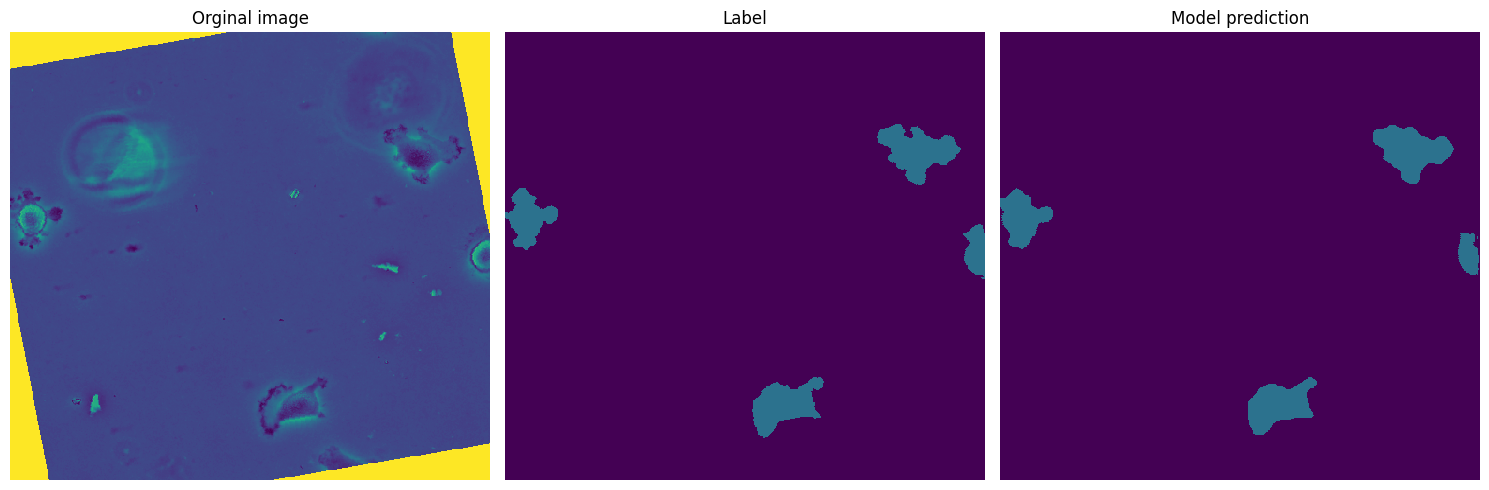

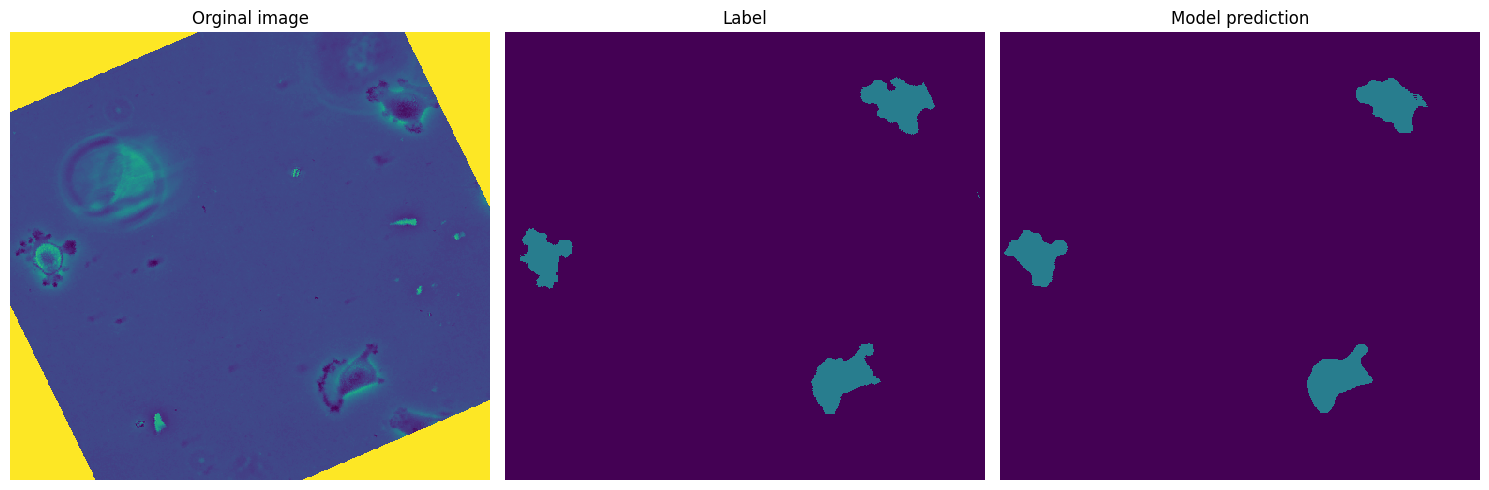

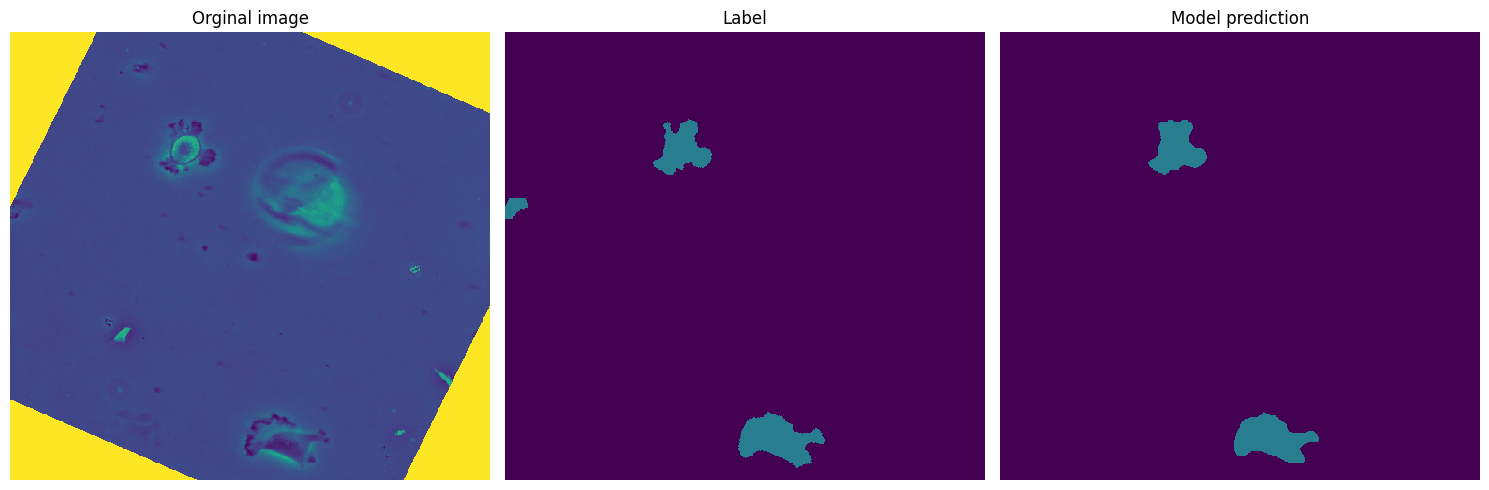

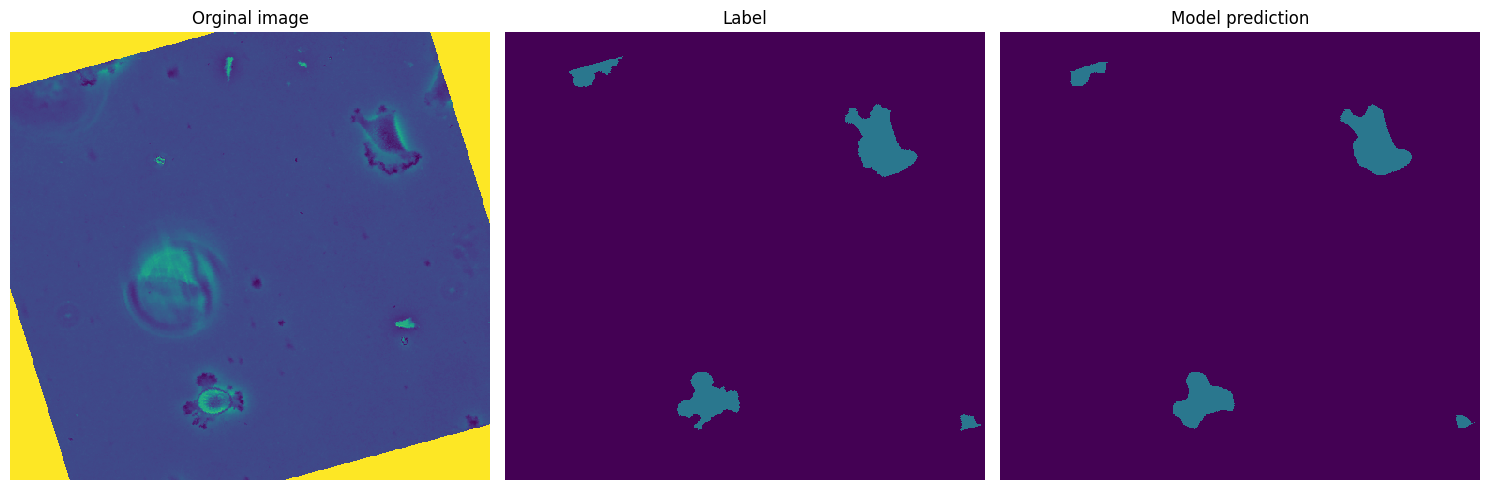

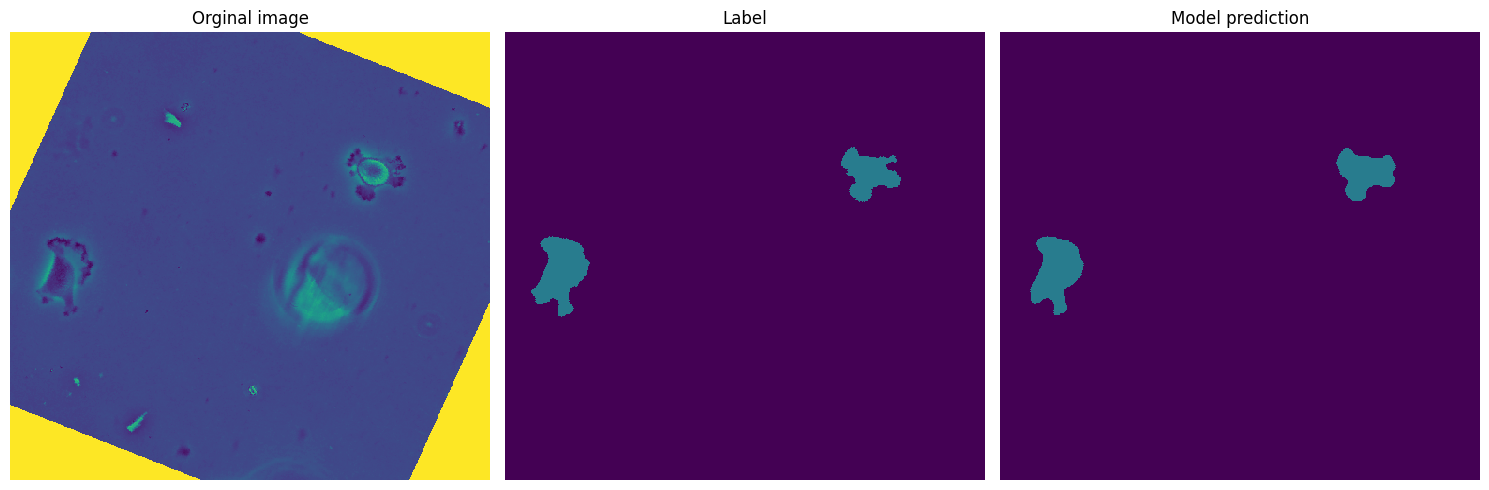

In [21]:
with torch.no_grad():
    for i in range(5):
        img, label = val_dataset[i]
        output = lightning_model(img.unsqueeze(0))
        output_np = lightning_model.generate_numpy_output_from_single_image(output)
        plot_results(img.squeeze().detach().numpy(), label.squeeze().numpy(), output_np)

Testing multimodal model

In [22]:
#PHC model
val_loss = lightning_model_multimodal.run_model_on_validation_dataloder(val_dataloader)
print('test loss = ', val_loss)

Avarage validation loss:  0.05713502566019694
test loss =  0.05713502566019694


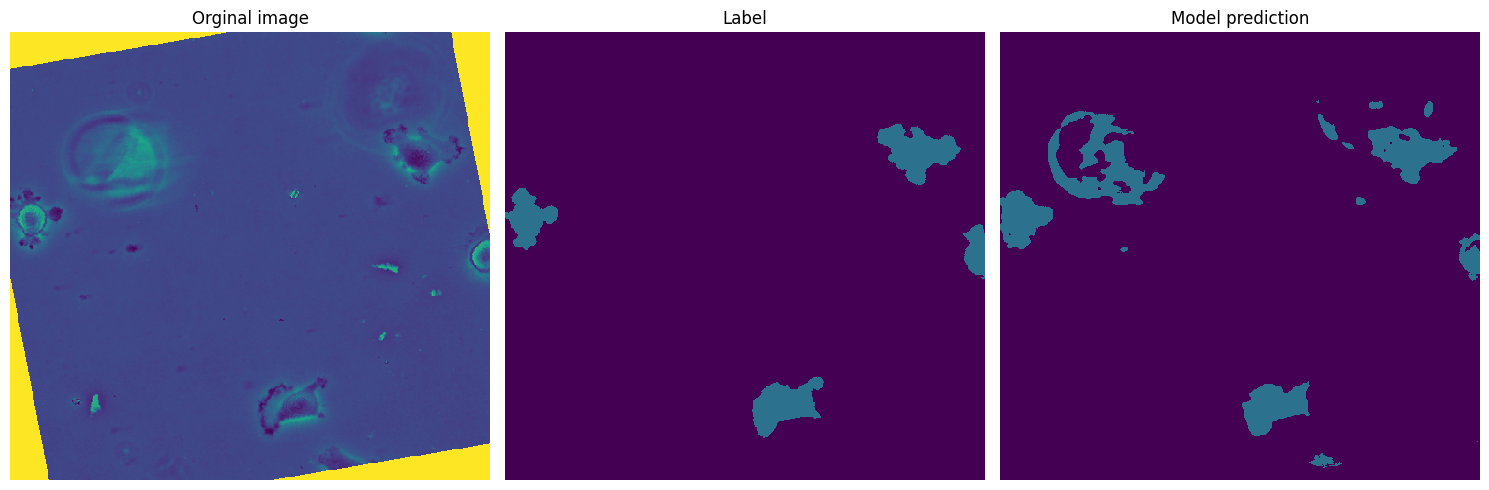

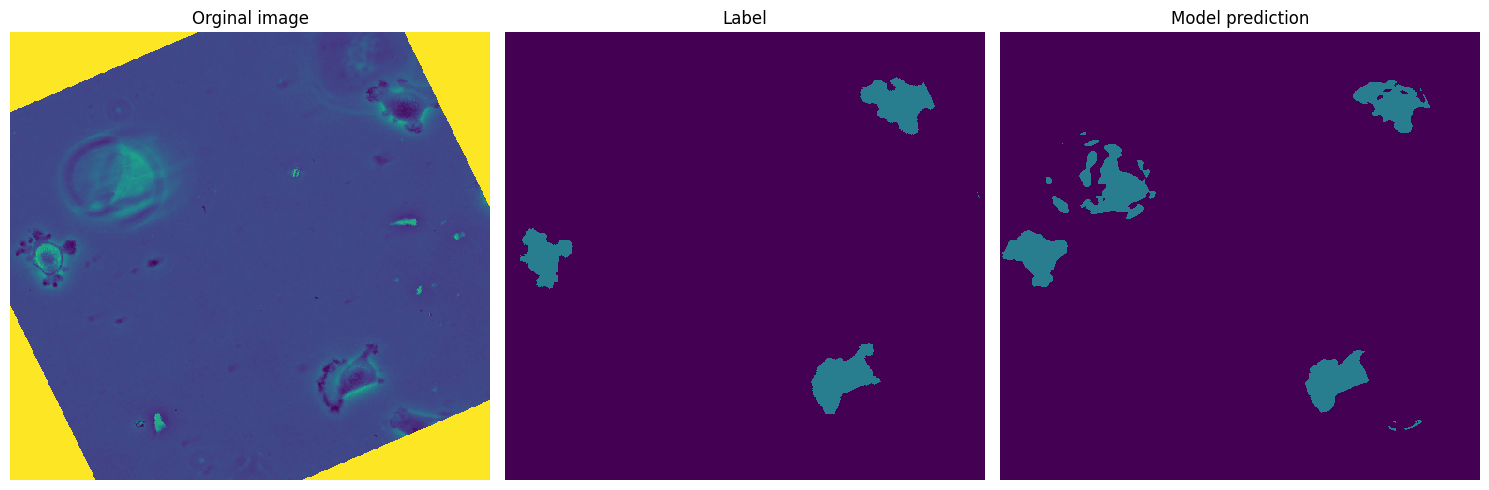

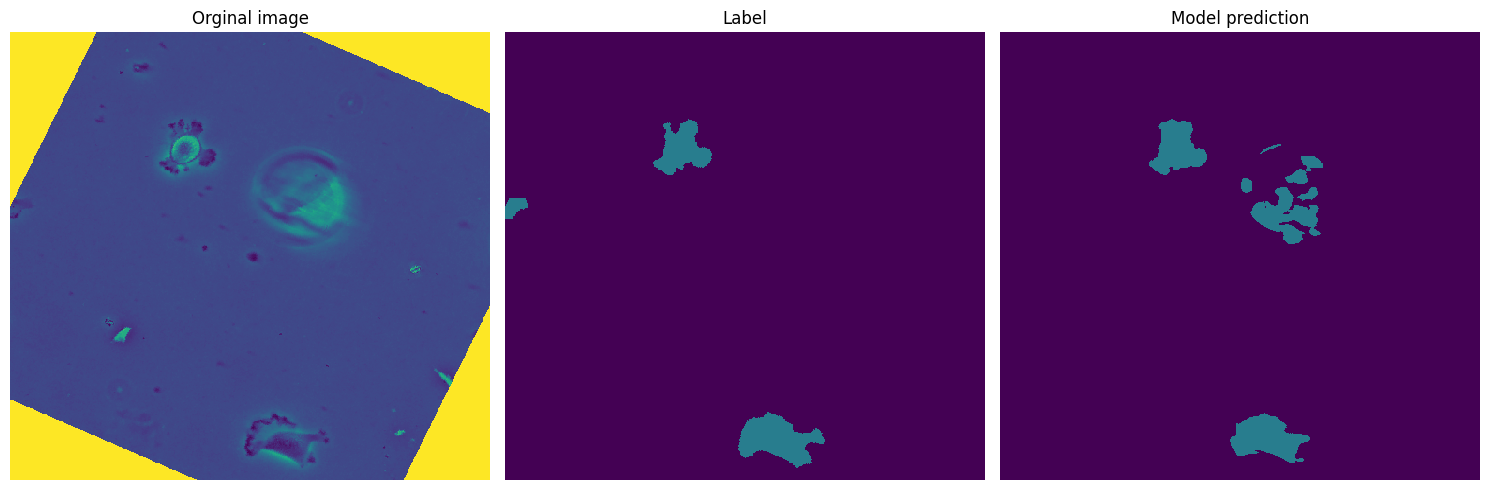

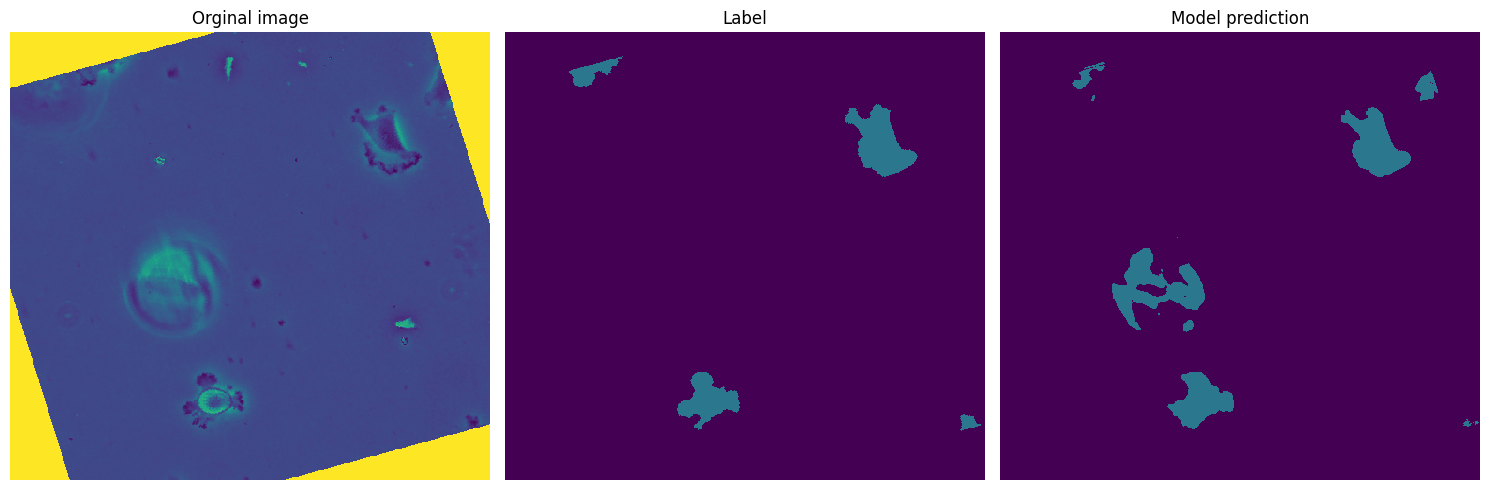

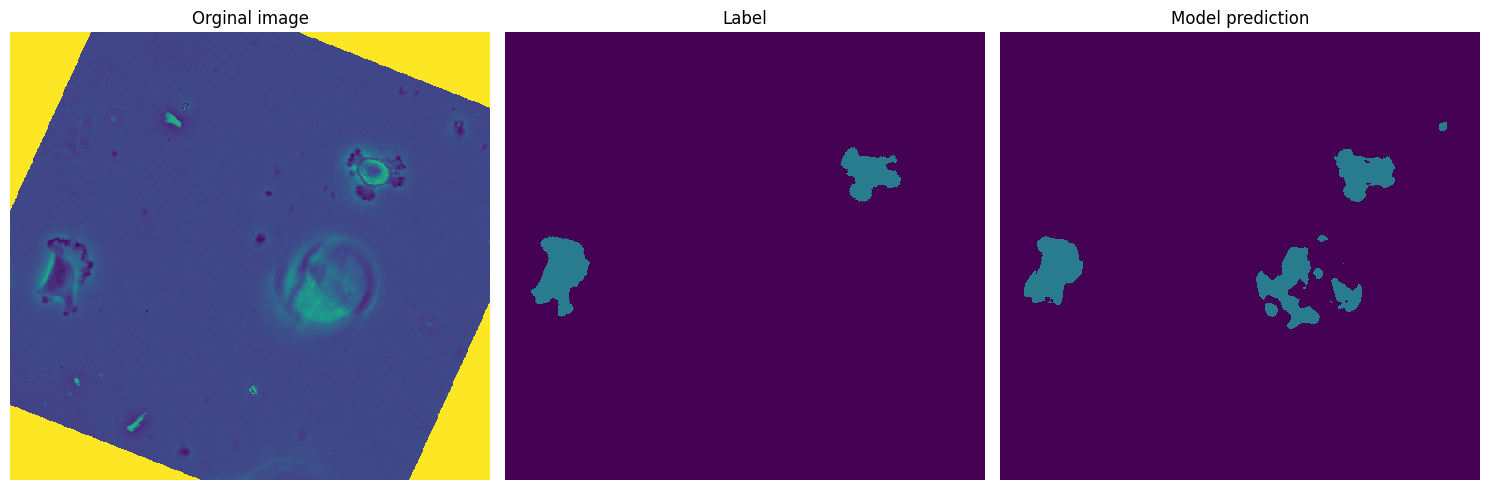

In [23]:
with torch.no_grad():
    for i in range(5):
        img, label = val_dataset[i]
        output = lightning_model_multimodal(img.unsqueeze(0))
        output_np = lightning_model_multimodal.generate_numpy_output_from_single_image(output)
        plot_results(img.squeeze().detach().numpy(), label.squeeze().numpy(), output_np)